In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [7]:
# Definición de puntos de la población

A= np.array([[3.1,2.3],[2.3,4.2],[3.9,3.5],[3.7,6.4],[4.8,1.9],
             [8.3,3.1],[5.2,7.5],[4.8,4.7],[3.5,5.1],[4.4,2.9]])
A

array([[3.1, 2.3],
       [2.3, 4.2],
       [3.9, 3.5],
       [3.7, 6.4],
       [4.8, 1.9],
       [8.3, 3.1],
       [5.2, 7.5],
       [4.8, 4.7],
       [3.5, 5.1],
       [4.4, 2.9]])

In [9]:
# Definir número de vecinos

k=3

# Definir punto a relacionar

test_data= [3.3,2.9]

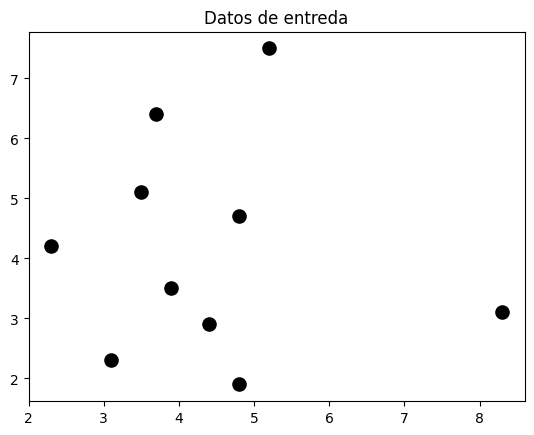

In [17]:
# Visualización de los puntos que se han definido

plt.figure()
plt.title("Datos de entreda")
plt.scatter(A[:,0],A[:,1], marker= "o", c= "black" ,s=90) # s es para el tamaño de los puntos

In [21]:
# Ejecución de algoritmo KNN

knn_model= NearestNeighbors(n_neighbors= k, algorithm= "auto").fit(A)
distances, indices= knn_model.kneighbors([test_data])

In [23]:
 # Impresión de los vecinos más cercanos
print("K vecinos más cercanos:")
for rank, index in enumerate (indices[0][:k], start= 1):
    print(str(rank)+"is", A[index])  # Son los 3 vecinos más cercanos

K vecinos más cercanos:
1is [3.1 2.3]
2is [3.9 3.5]
3is [4.4 2.9]


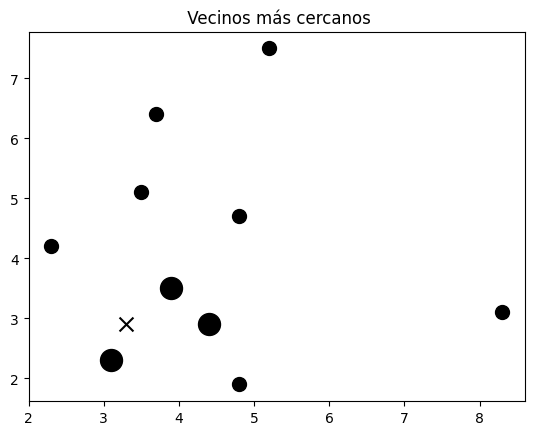

In [31]:
# Visualización de puntos asociados

plt.figure()
plt.title(" Vecinos más cercanos")
plt.scatter(A[:,0],A[:,1], marker="o", c="black", s=100)
plt.scatter(A[indices][0][:][:,0],A[indices][0][:][:,1], marker="o", s=250, c="black", facecolors= "none")
plt.scatter(test_data[0],test_data[1], marker="x", s=100, color="black")
plt.show()

In [39]:
A[indices] # Motivo de porque funciona al graficar

array([[[3.1, 2.3],
        [3.9, 3.5],
        [4.4, 2.9]]])

In [3]:
import os
os.chdir("C:/Users/odela/Downloads")
import pandas as pd
import numpy as np

In [5]:
df= pd.read_excel("Online Retail.xlsx")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [7]:
# Eliminar valoresnulos

datos= df.dropna()
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [9]:
# Delimitación de valores positivos del campo Quantity pues deseamos analizar lo realmente comprado

datos_reales= datos[datos["Quantity"]>0]
datos_reales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [20]:
basket= (datos_reales.groupby(["InvoiceNo","Description"]))["Quantity"].sum().unstack().reset_index().fillna(0).set_index("InvoiceNo")
basket

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,0.0,0.0,0.0,24.0,0.0,0.0


In [26]:
# Codificación a binario de la base previa para saber si un articulo se compró o no

def codificar(x):
    if x <= 0:
        return 0
    if x>= 0:
        return 1

basket_codificado= basket.applymap(codificar) # applymap aplica la función a todos los elementos de la base
basket_codificado

C:\Users\odela\AppData\Local\Temp\ipykernel_9112\3086687407.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_codificado= basket.applymap(codificar) # applymap aplica la función a todos los elementos de la base


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [28]:
# Filtrado de aquellas transacciones donde se compró más de 1 artículo

basket_filtrado= basket_codificado[(basket_codificado>0).sum(axis=1)>=2]
basket_filtrado

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [30]:
# Instalación del módulo mlxtend
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -------------------------------------- - 1.3/1.4 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 6.3 MB/s eta 0:00:00


In [34]:
# Aplicación de algoritmo "a priori" para localizar los articulos frecuentemente comprados en la base de datos
from mlxtend.frequent_patterns import apriori

In [46]:
# análisis "a priori" con soporte mínimo del 3%

artículos_frecuentes= apriori(basket_filtrado, min_support=.03,
                              use_colnames= True, ).sort_values( "support",ascending= False).reset_index(drop=True)
artículos_frecuentes["lenght"]=artículos_frecuentes["itemsets"].apply(lambda x:len(x))
artículos_frecuentes #Artículos y su porcentaje de frecuencia

C:\Users\odela\AppData\Local\Programs\Orange\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,lenght
0,0.113952,(WHITE HANGING HEART T-LIGHT HOLDER),1
1,0.098249,(REGENCY CAKESTAND 3 TIER),1
2,0.092586,(JUMBO BAG RED RETROSPOT),1
3,0.080152,(ASSORTED COLOUR BIRD ORNAMENT),1
4,0.079685,(PARTY BUNTING),1
...,...,...,...
107,0.030356,(SET OF 3 HEART COOKIE CUTTERS),1
108,0.030239,(RED TOADSTOOL LED NIGHT LIGHT),1
109,0.030181,"(LUNCH BAG BLACK SKULL., LUNCH BAG RED RETROS...",2
110,0.030181,(BLUE HARMONICA IN BOX ),1


In [44]:
from mlxtend.frequent_patterns import association_rules

In [50]:
 association_rules(artículos_frecuentes, metric= "confidence",
                   min_threshold=.5).sort_values("confidence", ascending= False).reset_index(drop=True) 

 # Asociaciones de compras de artículos con nivel de confianza de al menos el .5 ( quien compra antecedents, también suele comprar consequents)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.040339,0.045534,0.031582,0.782923,17.194200,1.0,0.029745,4.396906,0.981430,0.581720,0.772567,0.738257
1,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.045534,0.040339,0.031582,0.693590,17.194200,1.0,0.029745,3.131949,0.986773,0.581720,0.680710,0.738257
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.045768,0.051197,0.030940,0.676020,13.204367,1.0,0.028597,2.928590,0.968598,0.468612,0.658539,0.640177
3,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.050730,0.092586,0.031874,0.628308,6.786206,1.0,0.027177,2.441309,0.898208,0.286014,0.590384,0.486285
4,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.051197,0.045768,0.030940,0.604333,13.204367,1.0,0.028597,2.411705,0.974140,0.468612,0.585356,0.640177
5,(LUNCH BAG PINK POLKADOT),(LUNCH BAG RED RETROSPOT),0.054291,0.075131,0.030531,0.562366,7.485099,1.0,0.026452,2.113336,0.916139,0.308737,0.526815,0.484368


In [52]:
 association_rules(artículos_frecuentes, metric= "lift",
                   min_threshold=1.01).sort_values("lift", ascending= False).reset_index(drop=True) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.045534,0.040339,0.031582,0.693590,17.194200,1.0,0.029745,3.131949,0.986773,0.581720,0.680710,0.738257
1,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.040339,0.045534,0.031582,0.782923,17.194200,1.0,0.029745,4.396906,0.981430,0.581720,0.772567,0.738257
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.045768,0.051197,0.030940,0.676020,13.204367,1.0,0.028597,2.928590,0.968598,0.468612,0.658539,0.640177
3,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.051197,0.045768,0.030940,0.604333,13.204367,1.0,0.028597,2.411705,0.974140,0.468612,0.585356,0.640177
4,(LUNCH BAG PINK POLKADOT),(LUNCH BAG RED RETROSPOT),0.054291,0.075131,0.030531,0.562366,7.485099,1.0,0.026452,2.113336,0.916139,0.308737,0.526815,0.484368
5,(LUNCH BAG RED RETROSPOT),(LUNCH BAG PINK POLKADOT),0.075131,0.054291,0.030531,0.406371,7.485099,1.0,0.026452,1.593099,0.936783,0.308737,0.372293,0.484368
6,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.092586,0.050730,0.031874,0.344262,6.786206,1.0,0.027177,1.447637,0.939640,0.286014,0.309219,0.486285
7,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.050730,0.092586,0.031874,0.628308,6.786206,1.0,0.027177,2.441309,0.898208,0.286014,0.590384,0.486285
8,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.061296,0.075131,0.030181,0.492381,6.553602,1.0,0.025576,1.821974,0.902747,0.284066,0.451145,0.447045
9,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.075131,0.061296,0.030181,0.401709,6.553602,1.0,0.025576,1.568977,0.916251,0.284066,0.362642,0.447045
